In [1]:
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from pygenstability import plotting
from pygenstability.contrib.optimal_scales import *
from pygenstability.pygenstability import _evaluate_NVI

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF

In [3]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [4]:
#plt.rcParams.update({'font.size': 20})

# Sample network from ER model

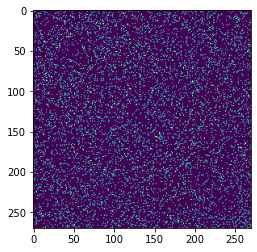

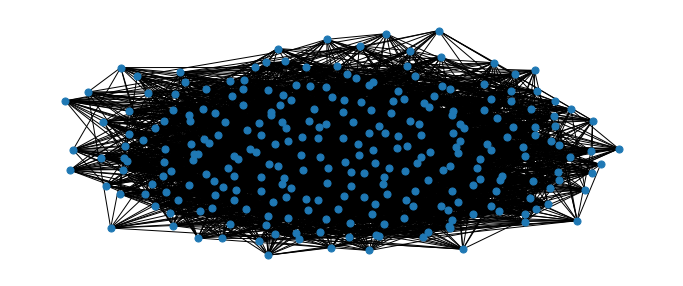

In [5]:
n = 270
m = 3473
seed = 20160 

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

A = nx.adjacency_matrix(G).toarray()

# plot matrix
plt.figure()
plt.imshow(A)
#plt.savefig(root_fig +'adjacency_matrix.pdf', bbox_inches='tight')
plt.show()

# Compute spring layout
pos = nx.layout.spring_layout(G, seed=2)


# Plot graph
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
fig.subplots_adjust(hspace=0.4, wspace=0)

nx.draw(
    G,
    ax=ax,
    pos=pos,
    node_size=50,
    arrows=False,
    width=1,
)


# plt.savefig(root_fig +'Multiscale_Structure.pdf', dpi=fig.dpi,bbox_inches='tight')

In [6]:
G.number_of_nodes()

270

In [7]:
G.number_of_edges()

3473

# Markov Stability filtration - full OOP framework


In [8]:
# Set MS parameters
n_time = 200
min_time = -1.5
max_time = 1.5

In [9]:
# initialise MSF object
msf = MSF()

# run MS analysis, build filtration and compute PH
msf.fit_transform(A,min_time,max_time,n_time,with_ttprime=True,with_optimal_scales=True)

Running Markov Stability analysis ... 


100%|██████████| 200/200 [01:15<00:00,  2.63it/s]


Building filtration ...


100%|██████████| 200/200 [00:35<00:00,  5.64it/s] 


Computing persistence ... 


filtration took 3:27

### Results from Markov Stability analysis

In [10]:
all_results = msf.ms_results

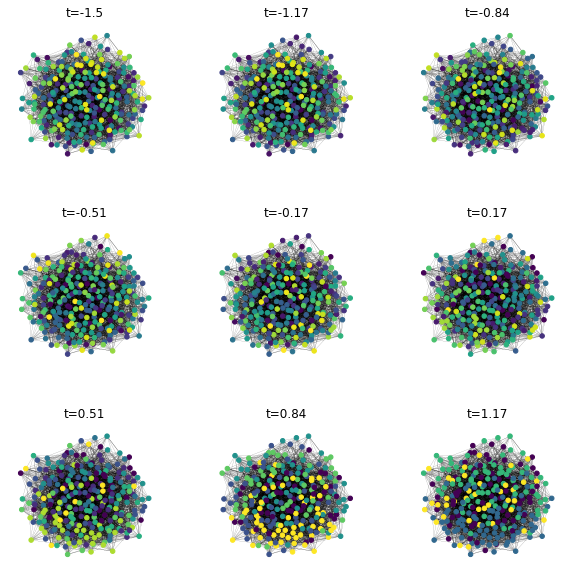

In [11]:
# Get times
times = all_results['times']
log_times = np.log10(all_results['times'])
n_time = all_results["run_params"]["n_time"]

# Get information about communities
community_id = all_results['community_id']
n_communities  = all_results['number_of_communities']

fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = int(i*len(times)/9)
    
    nx.draw(G, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time])
    ax.set(title=r't={}'.format(np.around(log_times[time],2)))
plt.show()

[-1.24371859]


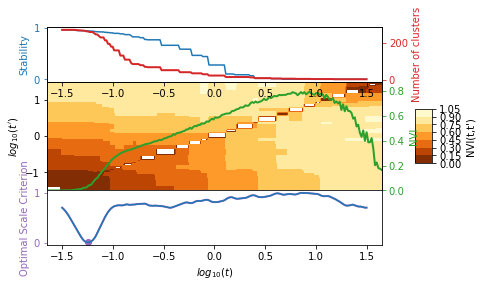

In [12]:
# select optimal scales
identify_optimal_scales(all_results,criterion_threshold=0.2,window_size=10)
selected_scales = log_times[all_results['selected_partitions']]
print(selected_scales)
plotting.plot_scan(all_results)
plt.savefig(root_fig +'MS_ER.pdf',bbox_inches='tight')

In [13]:
selected_paritions = all_results['selected_partitions']

n_communities = [len(np.unique(all_results['community_id'][i])) for i in range(len(times))]

### Persistent homology

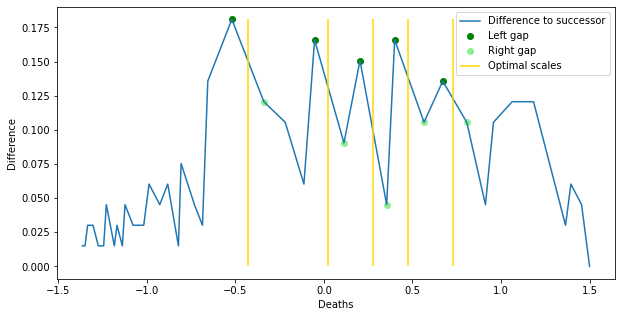

<AxesSubplot:xlabel='Deaths', ylabel='Difference'>

In [14]:
# Select optimal scales
msf.select_scales(threshold_abs=0.13,min_gap_width=0.13,with_plot=True)

In [15]:
msf.optimal_scales

array([ 71, 101, 118, 131, 148])

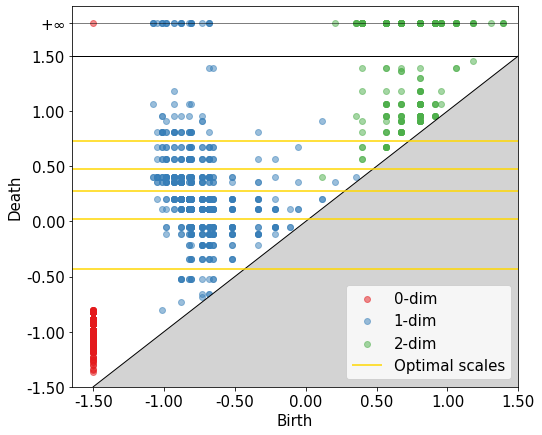

In [16]:
# Plot persistence diagram with optimal scales
ax = msf.plot_persistence_diagram()
plt.savefig(root_fig +'PD_ER.pdf', dpi=fig.dpi,bbox_inches='tight')